In [1]:
import numpy as np
import pandas as pd
import scipy  as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%precision 3
%matplotlib inline

In [7]:
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 3.5 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=962efb2244c5ed9308a88266f431a960602c237ede34eaacd8076c9a9b619aee
  Stored in directory: /Users/narenbao/Library/Caches/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [5]:
np.pi

3.142

In [4]:
np.exp(1)

2.718281828459045

In [8]:
x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt( 2 * np.pi * sigma **2)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

0.22831135673627742

In [9]:
#stats.確率分布の種類(norm,uniform,etc...).メソッドの種類(rvs,pdf,pmf...)
#期待値（平均値）loc, 標準偏差scale, 要素の数size,乱数生成のシードrandom_state=整数
stats.norm.pdf (loc = 4, scale=0.8, x = 3)

0.2283113567362774

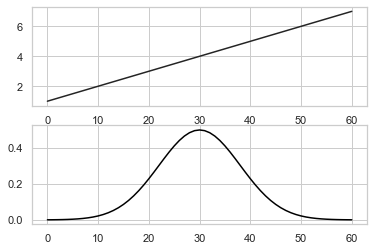

In [11]:
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

fig = plt.figure()

x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x_plot)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(stats.norm.pdf(x=x_plot, loc=4, scale = 0.8),
        color= 'black')


### t-value
$
t = \frac{\hat{\mu} - \mu}{\hat{\delta}/\sqrt{N}}
$
$\hat{\mu} $は標本平均、$\mu$は母平均$\hat{\delta}＄は標本から計算された標準偏差(不変分散の平方根)で、$N$はサンプルサイズ

$
t = \frac{標本平均-母平均}{標準誤差}
$

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


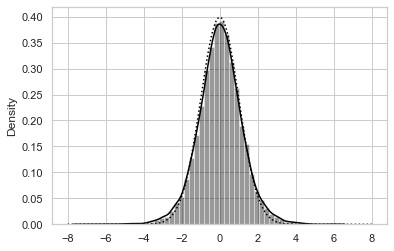

In [13]:
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean-4)/sample_se
    
sns.distplot(t_value_array, color='black')

x = np.arange(start=-8, stop=8.1, step=0.1)
plt.plot(x, stats.norm.pdf(x=x),
        color='black', linestyle='dotted')

### t分布
- 母集団分布が正規分布である時のt値の標本分布の分布
- 自由度：サンプルサイズが$N$の場合、$N-1$を自由度と呼びます。
- t分布の形状は自由度によって変わります。
- t分布の平均値が0です。
- t分布の分散は1より少し大きくなります。自由度が$n$だと分散は$\frac{n}{n-2}$、よって自由度が大きくなる、分散が1に近つきます。
- 意義：**母分散がわかっていなくても、標本平均の分布について言及することができる**